<a href="https://colab.research.google.com/github/tylee33/DLforFinance/blob/master/%E1%84%89%E1%85%B3%E1%84%90%E1%85%A1%E1%84%87%E1%85%A5%E1%86%A8%E1%84%89%E1%85%B3_%E1%84%8B%E1%85%B5%E1%84%83%E1%85%B5%E1%84%8B%E1%85%A3_%E1%84%89%E1%85%A1%E1%86%BC%E1%84%80%E1%85%AF%E1%86%AB%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 파일을 읽어 온다.
file = "../Downloads/sohodata_202103/소상공인시장진흥공단_상가(상권)정보_서울_202103.csv"
df = pd.read_csv(file,engine='python',encoding='utf-8')

In [ ]:
print('컬럼 항목수 : ',len(df.columns))
list(df.columns)

컬럼 항목수 :  39


['상가업소번호',
 '상호명',
 '지점명',
 '상권업종대분류코드',
 '상권업종대분류명',
 '상권업종중분류코드',
 '상권업종중분류명',
 '상권업종소분류코드',
 '상권업종소분류명',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드',
 '시도명',
 '시군구코드',
 '시군구명',
 '행정동코드',
 '행정동명',
 '법정동코드',
 '법정동명',
 '지번코드',
 '대지구분코드',
 '대지구분명',
 '지번본번지',
 '지번부번지',
 '지번주소',
 '도로명코드',
 '도로명',
 '건물본번지',
 '건물부번지',
 '건물관리번호',
 '건물명',
 '도로명주소',
 '구우편번호',
 '신우편번호',
 '동정보',
 '층정보',
 '호정보',
 '경도',
 '위도']

In [ ]:
# 한글 폰트 적용
from matplotlib import font_manager, rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

<Axes: >

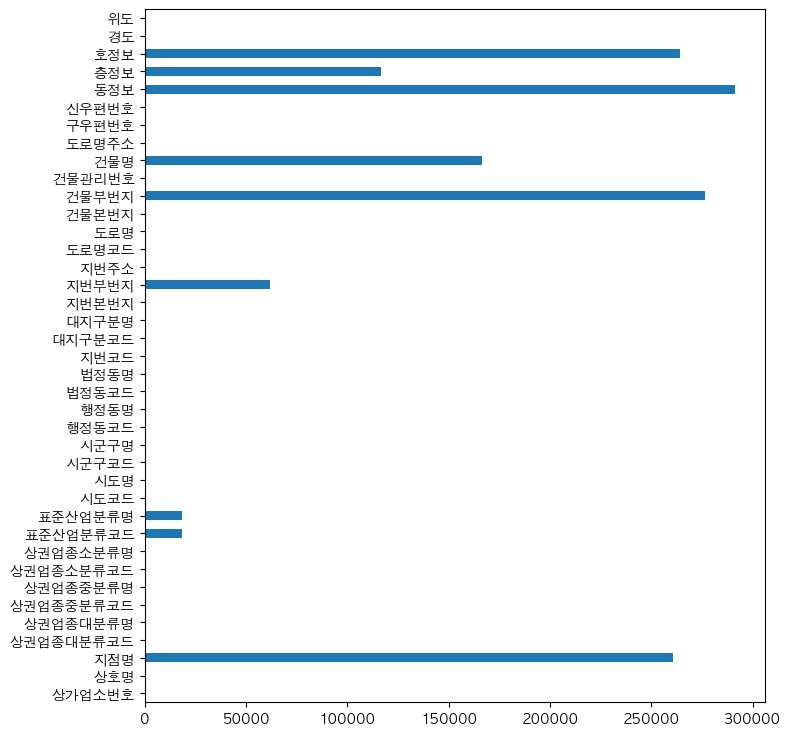

In [ ]:
#결측 데이터 확인하자.
df.isnull().sum().plot.barh(figsize=(8,9)) #그래프를 이용하면 확인하기 용이하다.

In [ ]:
#상권업종 확인하기
print('=' * 50)
print('상권업종대분류명',set(df['상권업종대분류명']))
print('=' * 50)
print('상권업종중분류명',set(df['상권업종중분류명']))

상권업종대분류명 {'학문/교육', '숙박', '생활서비스', '음식', '관광/여가/오락', '스포츠', '부동산', '소매'}
상권업종중분류명 {'기타서비스업', '요가/단전/마사지', '행사/이벤트', '닭/오리요리', '부동산임대', '운송/배달/택배', '가전제품소매', '전시/관람', '호텔/콘도', '학원기타', '의복의류', '자동차/이륜차', '광고/인쇄', '인력/고용/용역알선', '연극/영화/극장', '개인서비스', '패스트푸드', '유아교육', '실외운동시설', '건강/미용식품', '민박/하숙', '사진', '철물/난방/건설자재소매', '운동/경기용품소매', '유아용품', '이/미용/건강', '법무세무회계', '양식', '무도/유흥/가무', '캠프/별장/펜션', '개인/가정용품수리', '경마/경륜/성인오락', '대행업', '물품기기대여', '주택수리', '중고품소매/교환', '음/식료품소매', '기타음식업', '취미/오락관련소매', '분양', '기타판매업', '책/서적/도서', '음식배달서비스', '학원-예능취미체육', '자동차/자동차용품', '학문교육기타', '애견/애완/동물', '별식/퓨전요리', '시계/귀금속소매', '화장품소매', '가구소매', '일식/수산물', '주유소/충전소', '도서관/독서실', '학원-음악미술무용', '평가/개발/관리', '학원-보습교습입시', '부동산중개', '종교용품판매', '한식', '학원-컴퓨터', '의약/의료품소매', '예식/의례/관혼상제', '스포츠/운동', '학원-자격/국가고시', '놀이/여가/취미', '모텔/여관/여인숙', '부동산관련서비스', '학원-어학', '분식', '가방/신발/액세서리', '실내운동시설', 'PC/오락/당구/볼링등', '제과제빵떡케익', '종합소매점', '학원-창업취업취미', '가정/주방/인테리어', '유흥주점', '사무/문구/컴퓨터', '특수교육기관', '유스호스텔', '부페', '사진/광학/정밀기기소매', '중식', '운영관리시설', '대중목욕탕/휴게', '기타교육기관'

In [ ]:
#필요한 컬럼만 추출하자.
dataset = df[['상호명','지점명','상권업종대분류명','상권업종중분류명','시도명','시군구명','행정동명','법정동명','도로명주소','위도','경도']]
dataset.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,법정동명,도로명주소,위도,경도
0,비지트,NaN,음식,한식,서울특별시,서초구,방배4동,방배동,서울특별시 서초구 동광로18길 82,37.488375,126.991394
1,쓰리에프,NaN,음식,한식,서울특별시,동작구,사당2동,사당동,서울특별시 동작구 동작대로27가길 12,37.487105,126.980952
2,채움,NaN,음식,한식,서울특별시,종로구,종로1.2.3.4가동,수송동,서울특별시 종로구 삼봉로 81,37.572387,126.981794
3,호구의주방,NaN,소매,가정/주방/인테리어,서울특별시,영등포구,양평2동,양평동4가,서울특별시 영등포구 선유로 269,37.536700,126.897892
4,BYC상신점,상신점,소매,의복의류,서울특별시,송파구,거여2동,거여동,서울특별시 송파구 오금로 527,37.493054,127.147321


In [ ]:
#상호명을 모두 소문자로 변경해 주자.
dataset["상호명_소문자"] = dataset["상호명"].str.lower()

/var/folders/rf/xczzxbyd4p3ffh0_wcsz20xr0000gn/T/ipykernel_19290/3485216293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["상호명_소문자"] = dataset["상호명"].str.lower()


In [ ]:
#커피 전문점만 추출하자.
df_coffee = dataset[(dataset['상권업종중분류명']=='커피점/카페')]
df_coffee.index = range(len(df_coffee))
print('커피 전문점 점포 수 :',len(df_coffee))
df_coffee.head()

커피 전문점 점포 수 : 20391


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,법정동명,도로명주소,위도,경도,상호명_소문자
0,커피빈,코리아대학로대명거리점,음식,커피점/카페,서울특별시,종로구,혜화동,명륜4가,서울특별시 종로구 대명길 25,37.583149,127.000171,커피빈
1,요거프레소,쌍문점,음식,커피점/카페,서울특별시,도봉구,쌍문2동,쌍문동,서울특별시 도봉구 도당로 7,37.658728,127.034746,요거프레소
2,메머드커피,NaN,음식,커피점/카페,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 149,37.554599,126.929692,메머드커피
3,버블베어,NaN,음식,커피점/카페,서울특별시,강서구,방화3동,방화동,서울특별시 강서구 금낭화로 167,37.580941,126.813358,버블베어
4,우성커피숍,NaN,음식,커피점/카페,서울특별시,양천구,신월4동,신월동,서울특별시 양천구 오목로 48,37.522055,126.842935,우성커피숍


In [ ]:
df_coffee.loc[df_coffee['상호명_소문자'].str.contains('이디야|이디아|ediya'),"브랜드명"]="이디야"
df_coffee.loc[df_coffee['상호명_소문자'].str.contains('스타벅스|starbucks'),"브랜드명"]="스타벅스"
df_coffee = df_coffee[ (df_coffee["브랜드명"]=="이디야") | (df_coffee["브랜드명"]=="스타벅스")]
df_coffee.head()

/var/folders/rf/xczzxbyd4p3ffh0_wcsz20xr0000gn/T/ipykernel_19290/2072087509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee.loc[df_coffee['상호명_소문자'].str.contains('이디야|이디아|ediya'),"브랜드명"]="이디야"


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,법정동명,도로명주소,위도,경도,상호명_소문자,브랜드명
32,이디야커피,신길역점,음식,커피점/카페,서울특별시,영등포구,신길1동,신길동,서울특별시 영등포구 영등포로 353,37.515118,126.918062,이디야커피,이디야
49,스타벅스,동숭로아트점,음식,커피점/카페,서울특별시,종로구,이화동,동숭동,서울특별시 종로구 동숭길 110,37.582964,127.003887,스타벅스,스타벅스
50,이디야커피,라이프점,음식,커피점/카페,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 63로 40,37.519544,126.939198,이디야커피,이디야
79,이디야커피양재AT점,양재AT점,음식,커피점/카페,서울특별시,서초구,양재2동,양재동,서울특별시 서초구 동산로 3,37.469075,127.040265,이디야커피양재at점,이디야
84,스타벅스남부터미널2점,남부터미널2점,음식,커피점/카페,서울특별시,서초구,서초3동,서초동,서울특별시 서초구 효령로 274,37.484386,127.014198,스타벅스남부터미널2점,스타벅스


<Axes: xlabel='시군구명', ylabel='count'>

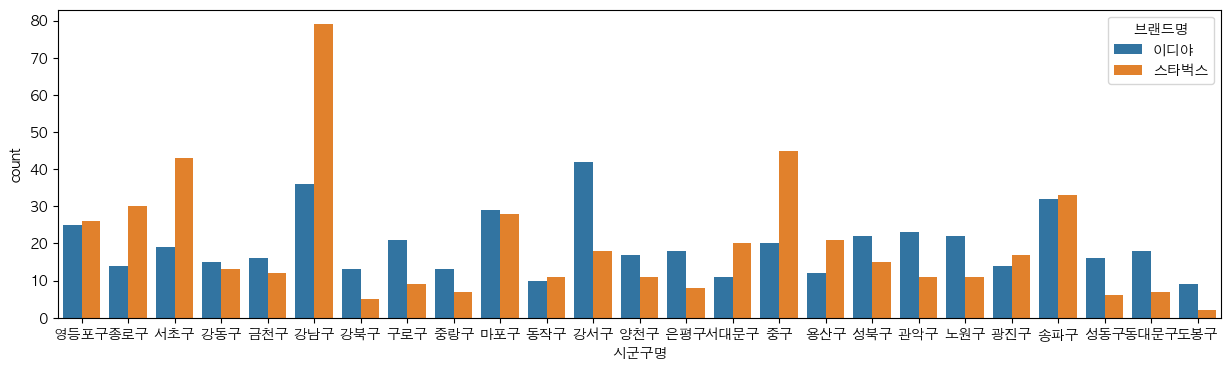

In [ ]:
#시군구별로 그래프를 그려 보자.
plt.figure(figsize=(15,4))
sns.countplot(data=df_coffee,x="시군구명",hue="브랜드명")

<Axes: xlabel='경도', ylabel='위도'>

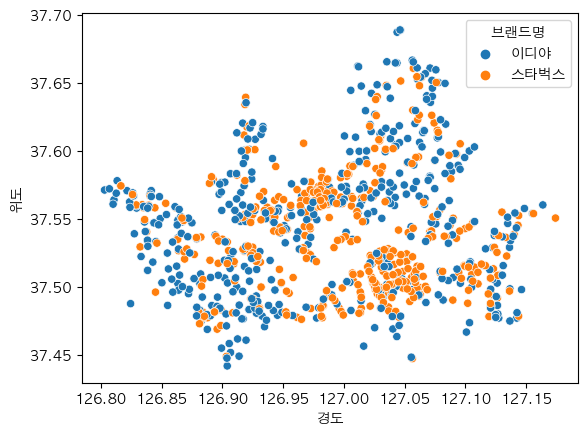

In [ ]:
sns.scatterplot(data=df_coffee,x="경도",y="위도",hue="브랜드명")

In [ ]:
#시군구명,브랜드명으로 갯수를 세어 보자.
df_cafe_vs = df_coffee.groupby(["시군구명","브랜드명"])["상호명"].count()
df_cafe_vs = df_cafe_vs.reset_index()
df_cafe_vs

,시군구명,브랜드명,상호명
0,강남구,스타벅스,79
1,강남구,이디야,36
2,강동구,스타벅스,13
3,강동구,이디야,15
4,강북구,스타벅스,5
5,강북구,이디야,13
6,강서구,스타벅스,18
7,강서구,이디야,42
8,관악구,스타벅스,11
9,관악구,이디야,23


In [ ]:
df_cafe_vs.columns=["구","브랜드명","매장수"]
df_cafe_vs.head()

,구,브랜드명,매장수
0,강남구,스타벅스,79
1,강남구,이디야,36
2,강동구,스타벅스,13
3,강동구,이디야,15
4,강북구,스타벅스,5


In [ ]:
#맵을 사용하기 위해 folium 사용법을 알아 보자.
import folium
new_map=folium.Map(location=[37.5429,126.9887],zoom_start=17) #서울의 중심
new_map

In [ ]:
# 해당 매장의 위치별 중심점을 잡아보자
lat = df_coffee["위도"].mean()
long = df_coffee["경도"].mean()
lat,long

(37.541717721205906, 126.98925713959065)

In [ ]:
new_map=folium.Map(location=[lat,long],zoom_start=12,tiles="Stamen Toner") #서울의 중심
new_map

In [ ]:
for i in df_coffee.index:
  sub_lat=df_coffee.loc[i,"위도"]
  sub_long = df_coffee.loc[i,"경도"]

  title = f"{df_coffee.loc[i,'상호명']}-{df_coffee.loc[i,'도로명주소']}"
  if df_coffee.loc[i,"브랜드명"]=="스타벅스":
    color = "green"
  else :
    color = "blue"
  folium.CircleMarker([sub_lat,sub_long],radius=3,color=color,tooltip=title).add_to(new_map) #마우스 댔을 때 tooltip으로 

new_map

### 서울의 경계를 구분으로 깔끔하게 표시를 해 보자.
### 시각화 하기 위해서 지리정보를 담고 있는 폴리곤 json 파일이 필요하다.
### https://github.com/PinkWink/DataScience/tree/master/data
### 위 링크에서 02. skorea_municipalities_geo_simple.json 파일을 다운로 받는다.

In [ ]:
geo_file = '02.skorea_municipalities_geo_simple.json'
import json
geo_json = json.load(open(geo_file,encoding='utf-8'))

In [ ]:
#스타벅스 매장만 가져 오자
df_star = df_cafe_vs[df_cafe_vs["브랜드명"]=="스타벅스"]
df_star

,구,브랜드명,매장수
0,강남구,스타벅스,79
2,강동구,스타벅스,13
4,강북구,스타벅스,5
6,강서구,스타벅스,18
8,관악구,스타벅스,11
10,광진구,스타벅스,17
12,구로구,스타벅스,9
14,금천구,스타벅스,12
16,노원구,스타벅스,11
18,도봉구,스타벅스,2


In [ ]:
m=folium.Map(location=[lat,long],zoom_start=12) #서울의 중심
folium.Choropleth(
    geo_data=geo_json,
    data=df_star,
    columns=["구","매장수"],
    key_on = "feature.properties.name", #색상별로 밀집 현황 확인
    fill_color="YlGn", #옐로우 그린
    fill_opacity = 0.7 #투명도
).add_to(m)
m